In [ ]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 2.1 MB/s 
     |████████████████████████████████| 9.1 MB 16.2 MB/s 
     |████████████████████████████████| 79 kB 7.5 MB/s 
     |████████████████████████████████| 140 kB 57.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [ ]:
import boto3
import json
import os
from PIL import Image
import psycopg2

In [ ]:
def load_db():
  with open("/content/drive/MyDrive/yeoreodigm/data_files/db_info.json") as json_file:
    DB_INFO = json.load(json_file)
  
  endpoint = DB_INFO["ENDPOINT"]
  dbname = DB_INFO["DB_NAME"]
  user = DB_INFO["USER_ID"]
  password = DB_INFO["PASSWORD"]
  db = psycopg2.connect(host=endpoint,dbname=dbname,user=user,password=password)
  return db

In [27]:
#access 계정있어서 지웠음
def connect_s3():
  pass

##s3 내부에서 파일 찾기

In [ ]:
bucket = resource.Bucket("yeoreodigm-s3")

In [ ]:
for idx, obj in enumerate(bucket.objects.all()):
  print(obj.key)
  

##업로드

In [ ]:
tmp_img = "/content/drive/MyDrive/pillow_image_files/프레임사진.jpeg"
bucket_name = 'yeoreodigm-s3'
key = "assets/photoDigm/userPicture/test2.jpeg"

In [ ]:
resource.meta.client.upload_file(tmp_img,bucket_name,key)

##다운로드

In [ ]:
save_to = "/content/drive/MyDrive/pillow_image_files/프레임사진2.jpeg"

In [ ]:
resource.meta.client.download_file(bucket_name,key,save_to)

In [ ]:
"assets/photoDigm/userPicture/test.png"

##s3에서 runtime으로 file load

In [ ]:
directory_path = "assets/photoDigm/userPicture/"
searching_file = "test.png"
img_file = None
for obj in bucket.objects.all():
  if obj.key == directory_path + searching_file:
    img_file = obj.get()['Body'].read()

In [ ]:
type(img_file)

bytes

In [ ]:
download_img = Image.open(io.BytesIO(img_file))


##runtime image load 이후 다시 업로드

In [ ]:
from PIL import Image
import io

In [ ]:
download_img = Image.open(io.BytesIO(img_file))
download_img.show()

In [ ]:
display(download_img)

In [ ]:
frame_img =  Image.open("/content/drive/MyDrive/pillow_image_files/프레임사진.jpeg")

In [ ]:
attach_img = Image.open("/content/drive/MyDrive/pillow_image_files/쵸단1.png")

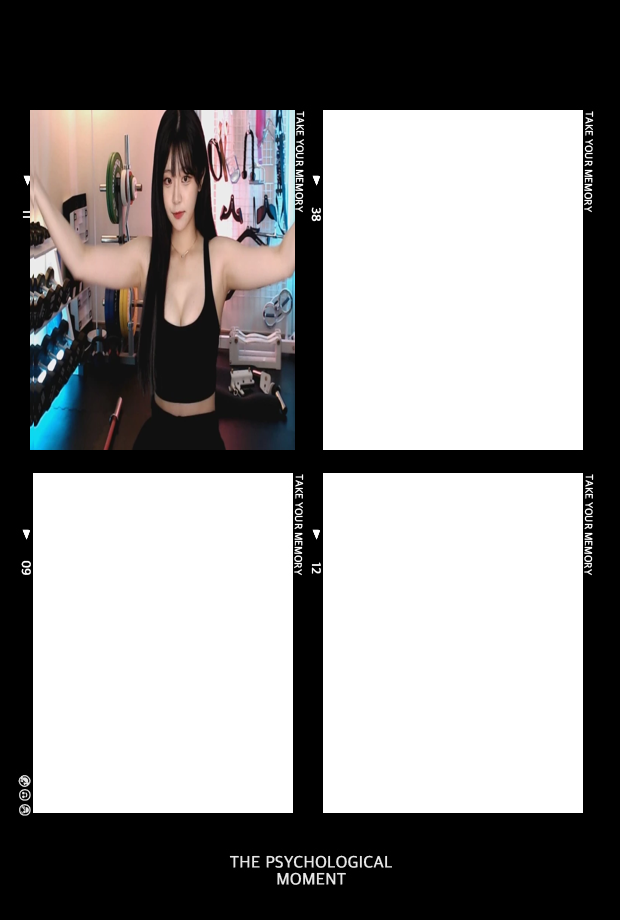

In [22]:
attach_img = attach_img.resize((260,340))
frame_img.paste(attach_img,(36 ,110))
display(frame_img)

In [ ]:
bucket_name = 'yeoreodigm-s3'
key = "assets/photoDigm/photoDigm/test_photodigm.png" 

In [ ]:
mem_out = io.BytesIO()
frame_img.save(mem_out,format=frame_img.format)
mem_out.seek(0)

0

In [ ]:
# resource.meta.client.upload_file(mem_out,bucket_name,key)
resource.meta.client.upload_fileobj(mem_out,bucket_name,key)

ValueError: ignored

##람다에 적용한 이미지 로드 및 수정 테스트

In [23]:
img_prefix = "assets/photoDigm/userPicture/"
frame_prefix = "assets/photoDigm/frame/"
photoDigm_prefix = "assets/photoDigm/photoDigm/"

In [67]:
mydict ={"img1":"iu_1.png",
    "img2":"iu_2.jpeg",
    "img3":"iu_3.jpeg",
    "img4":"iu_4.jpeg",
    "frame": "frame1.png",
    "key": "first.lambda_result2.png"}

In [72]:
img1 = mydict['img1']
img2 = mydict['img2']
img3 = mydict['img3']
img4 = mydict['img4']
frame = mydict['frame']
key = mydict['key']

resource = connect_s3()

In [57]:
#aws 정보 있어서 지웠음
def connect_s3():
  pass

In [71]:
def load_image(client,img_type,file_name):
  bucket_name = "yeoreodigm-s3"
  image_type_directory = {"image":img_prefix,"frame":frame_prefix,"photoDigm":photoDigm_prefix}

  directory_path = image_type_directory[img_type]
  entire_path = directory_path + file_name  
  result = client.list_objects(Bucket = bucket_name, Prefix=entire_path)

  for obj in result.get('Contents'):
    data = client.get_object(Bucket=bucket_name,Key=obj.get('Key'))
    data_content = data['Body'].read()
    #display(Image.open(io.BytesIO(data_content)))
    return Image.open(io.BytesIO(data_content))
    
    

In [63]:
client = connect_s3()

In [73]:
frame =load_image(client=client,img_type='frame',file_name=frame) 
img1 = load_image(client=client,img_type='image',file_name=img1).resize((260,340))
img2 = load_image(client=client,img_type='image',file_name=img2).resize((260,340))
img3 = load_image(client=client,img_type='image',file_name=img3).resize((260,340))
img4 = load_image(client=client,img_type='image',file_name=img4).resize((260,340))

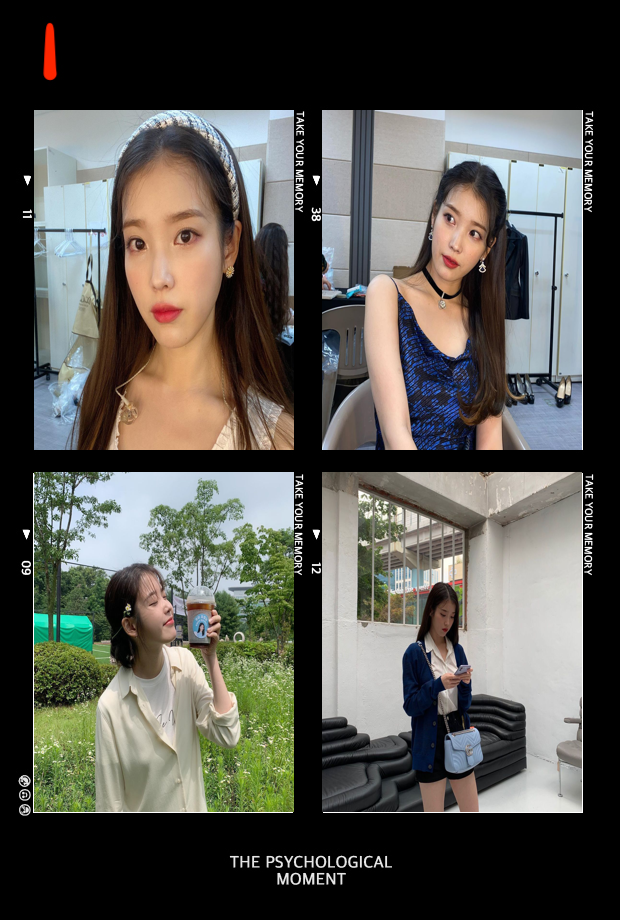

In [75]:
x1 = 34
x2 = 322
y1 = 110
y2 = 472
frame_img.paste(img1,(x1,y1))
frame_img.paste(img2,(x2,y1))
frame_img.paste(img3,(x1,y2))
frame_img.paste(img4,(x2,y2))
display(frame_img)

In [76]:
mem_out = io.BytesIO()
frame_img.save(mem_out,format=frame_img.format)
mem_out.seek(0)

0

In [78]:
# resource.meta.client.upload_file(mem_out,bucket_name,key)
save_path = "assets/photoDigm/photoDigm/" + 'test_on_collab.png'
client.upload_fileobj(mem_out,bucket_name,save_path)

##실제로 람다에 올린 함수 테스트

In [2]:
!pip3 install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 5.1 MB/s 
     |████████████████████████████████| 79 kB 7.3 MB/s 
     |████████████████████████████████| 9.2 MB 61.4 MB/s 
     |████████████████████████████████| 140 kB 70.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [5]:
def load_aws_key():
  with open("/content/drive/MyDrive/yeoreodigm/data_files/aws_access_info.json") as json_file:
    AWS_INFO = json.load(json_file)
  
  access_key = AWS_INFO["AWS_ACCESS_KEY_ID"]
  secret_key = AWS_INFO["AWS_SECRET_ACCESS_KEY"]
  region = AWS_INFO["REGION_NAME"]

  return access_key,secret_key,region 

In [3]:
import json
from PIL import Image
import boto3
import psycopg2
import os
import io

prefix_info = {
  'image' : "assets/photoDigm/userPicture/",
  'frame' : "assets/photoDigm/frame/",
  'photoDigm' : "assets/photoDigm/photoDigm/",
}

def load_aws_key():
  pass
def connect_s3():
  access_key,secret_key,region = load_aws_key()
  return boto3.client('s3',aws_access_key_id=access_key,
                                  aws_secret_access_key=secret_key,
                                  region_name=region)
    
#img_type : frame,image,photoDigm
def load_image(client,img_type,file_name):
  bucket_name = "yeoreodigm-s3"
  prefix = prefix_info[img_type]

  
  entire_path = prefix + file_name  #디렉토리 경로를 모두 포함한 파일 경로
  result = client.list_objects(Bucket = bucket_name, Prefix=entire_path)

  for obj in result.get('Contents'):
    data = client.get_object(Bucket=bucket_name,Key=obj.get('Key'))
    data_content = data['Body'].read()
    #display(Image.open(io.BytesIO(data_content)))
    return Image.open(io.BytesIO(data_content))
    
    
    
def lambda_handler(event, context):
  # TODO implement
  img1 = event['img1']
  img2 = event['img2']
  img3 = event['img3']
  img4 = event['img4']
  frame = event['frame']
  key = event['key']
  
  client = connect_s3()
  
  try:
    frame_img = load_image(client=client,img_type='frame',file_name=frame) 
    img1 = load_image(client=client,img_type='image',file_name=img1).resize((260,340))
    img2 = load_image(client=client,img_type='image',file_name=img2).resize((260,340))
    img3 = load_image(client=client,img_type='image',file_name=img3).resize((260,340))
    img4 = load_image(client=client,img_type='image',file_name=img4).resize((260,340))
  except:
      return {
      'statusCode': 400,
      'body': json.dumps('Failed to Load Image from s3!'),

  }
  x1 = 34
  x2 = 322
  y1 = 110
  y2 = 472
  
  frame_img.paste(img1,(x1,y1))
  frame_img.paste(img2,(x2,y1))
  frame_img.paste(img3,(x1,y2))
  frame_img.paste(img4,(x2,y2))
  
  mem_out = io.BytesIO()
  frame_img.save(mem_out,format=frame_img.format) # binary data를 BytesIO로 변환해서 memout에 담기
  mem_out.seek(0)#파일포인터(?) 복구
  bucket_name = 'yeoreodigm-s3'
  save_path = prefix_info['photoDigm'] + key
  client.upload_fileobj(mem_out,bucket_name,save_path)
  
  return {
      'statusCode': 200,
      'body': json.dumps('Hello from Lambda!'),
      
      
      
  }
